# 의사 결정 나무 (Iris 데이터셋)

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.데이터 준비

In [20]:
!wget https://raw.githubusercontent.com/devdio/datasets/refs/heads/main/iris.csv

--2024-12-31 00:47:16--  https://raw.githubusercontent.com/devdio/datasets/refs/heads/main/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3858 (3.8K) [text/plain]
Saving to: ‘iris.csv.1’

iris.csv.1          100%[===================>]   3.77K  --.-KB/s    in 0s      

2024-12-31 00:47:16 (51.7 MB/s) - ‘iris.csv.1’ saved [3858/3858]



In [21]:
df = pd.read_csv('iris.csv')
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
# 컬럼명 정리
df.columns = [col.replace(' ', '_').lower() for col in df.columns]
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 2.데이터 분리

In [23]:
X = df.drop('species', axis=1)
y = df['species']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [27]:
columns = X_train.columns
columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [28]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

In [29]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

## 3.베이스 모델

In [30]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [31]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

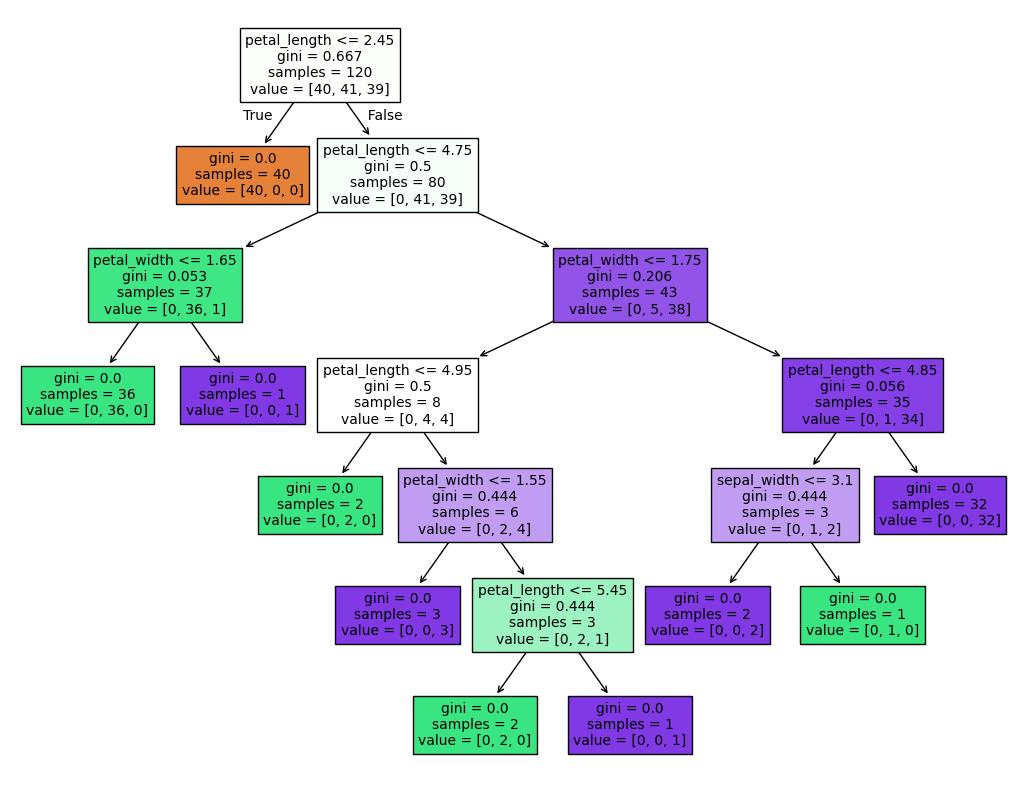

In [32]:
plt.figure(figsize=(13, 10))
plot_tree(clf, feature_names=columns, filled=True, fontsize=10)
plt.show()

## 4.규제(튜닝)

In [33]:
clf = DecisionTreeClassifier(max_depth=3, min_samples_split=4, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=4, random_state=42)

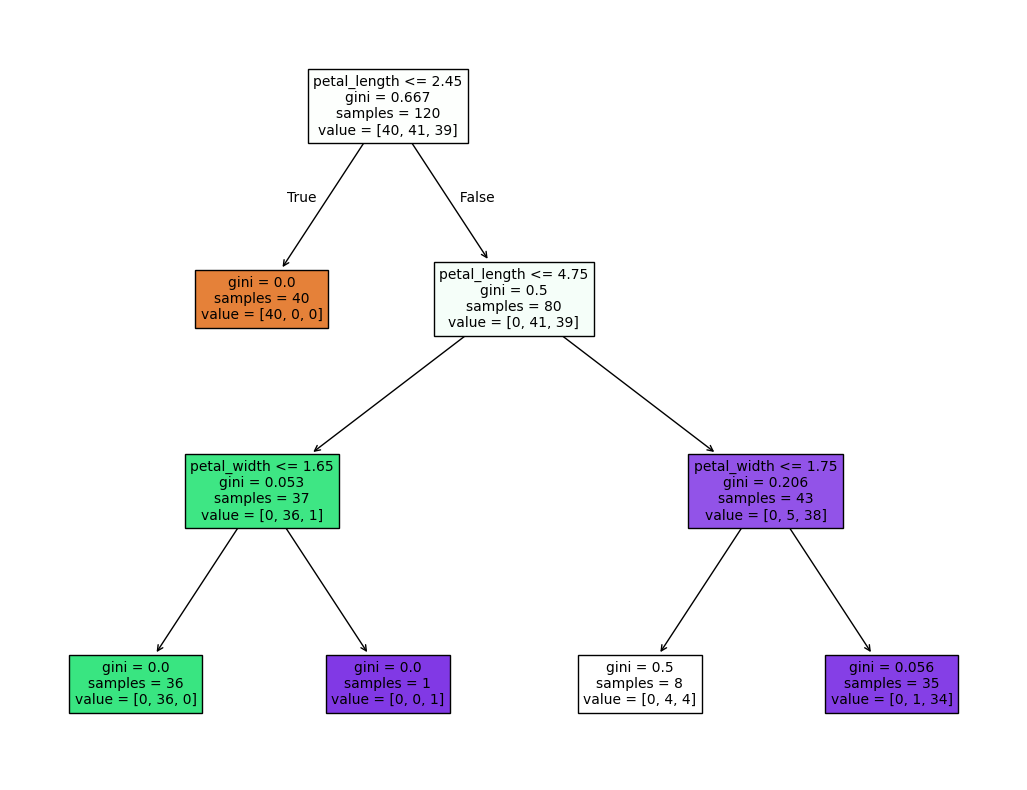

In [34]:
plt.figure(figsize=(13, 10))
plot_tree(clf, feature_names=columns, filled=True, fontsize=10)
plt.show()

## 5.테스트

In [35]:
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [36]:
y_pred = clf.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

In [38]:
def print_metrics(y_true, y_pred):
  acc = accuracy_score(y_true, y_pred)
  re = recall_score(y_true, y_pred,average='macro')
  pre = precision_score(y_true, y_pred,average='macro')
  f1 = f1_score(y_true, y_pred,average='macro')

  print('acc: ', acc)
  print('recall: ', np.around(re, 4))
  print('precision: ', np.around(pre, 4))
  print('f1: ', np.around(f1, 4))

  cfm = confusion_matrix(y_true, y_pred)
  s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)
  s.set(xlabel='Prediction', ylabel='Actual')
  plt.show()

acc:  1.0
recall:  1.0
precision:  1.0
f1:  1.0


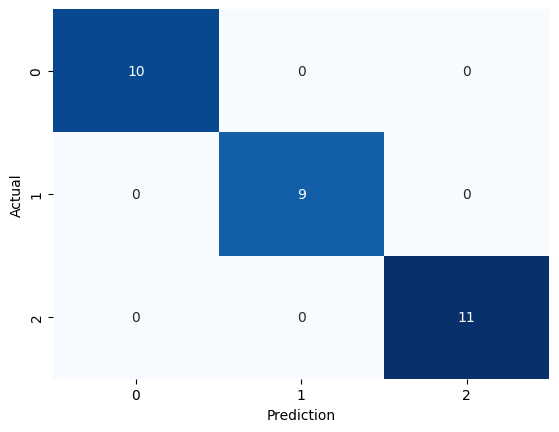

In [39]:
print_metrics(y_test, y_pred)

## 6.변수 중요도 확인

In [40]:
columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [41]:
clf.feature_importances_

array([0.        , 0.        , 0.93462632, 0.06537368])

# END